<a href="https://colab.research.google.com/github/Mrinalkumar1/Machine-Learning-Project/blob/main/Mumbai_rent_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here we have a dataset of Mumbai's rental flat and what we are going to do is analyze the dataset and try to come up with a prediction algorithm which will help us to predict the price of the flat when we input all the columns which make a difference to price of the flat. **

https://www.kaggle.com/sufyanpatel/data-science-regression-project

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [27]:
df = pd.read_csv("/content/drive/MyDrive/ML Projects /Mumbai flats rent/prop_data_clean.csv")

In [28]:
df.head()

,area,bathroom_num,bedroom_num,city,desc,dev_name,floor_count,floor_num,furnishing,id,id_string,latitude,locality,longitude,post_date,poster_name,price,project,title,trans,type,url,user_type
0,350.0,2.0,1,Mumbai,"2 Bath,Unfurnished,East facing The project has...",NaN,NaN,NaN,Unfurnished,45349857,domcache_srp_45349857,19.201336,Malad West,72.825882,2020-01-11,Saurabh Patil,9000,NaN,1 BHK Apartment for Rent in Malad West,Rent,Apartment,/propertyDetails/1-BHK-350-Sq-ft-Multistorey-A...,Agent
1,652.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing A 1BHK apart...",Veena Group,NaN,NaN,Semi-Furnished,45960973,domcache_srp_45960973,19.410704,Vasai,72.833592,2020-01-11,Gorakh Chavan,8060,Veena Dynasty,"1 BHK Apartment for Rent in Veena Dynasty, Vasai",Rent,Apartment,/propertyDetails/1-BHK-652-Sq-ft-Multistorey-A...,Agent
2,635.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,4 floor,West facing A be...",Agarwal Group,7.0,4.0,Semi-Furnished,46688849,domcache_srp_46688849,19.467032,Virar,72.801612,2019-12-13,Lokesh Joshi,8000,Agarwal Lifestyle,"1 BHK Apartment for Rent in Agarwal Lifestyle,...",Rent,Apartment,/propertyDetails/1-BHK-635-Sq-ft-Multistorey-A...,Agent
3,540.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing Essential Se...",NaN,NaN,NaN,Semi-Furnished,44696119,domcache_srp_44696119,19.407257,Vasai East,72.836006,2020-01-13,Sajith Thomas,8000,NaN,1 BHK Apartment for Rent in Vasai East,Rent,Apartment,/propertyDetails/1-BHK-540-Sq-ft-Multistorey-A...,Agent
4,625.0,1.0,1,Mumbai,"1 Bath,Furnished,2 floor,North facing 24 hours...",Millennium Group,7.0,2.0,Furnished,46742851,domcache_srp_46742851,19.360215,Naigaon East,72.850167,2019-12-17,Charmaine Gomez,9000,Mittal Enclave,"1 BHK Apartment for Rent in Mittal Enclave, Na...",Rent,Apartment,/propertyDetails/1-BHK-625-Sq-ft-Multistorey-A...,Owner


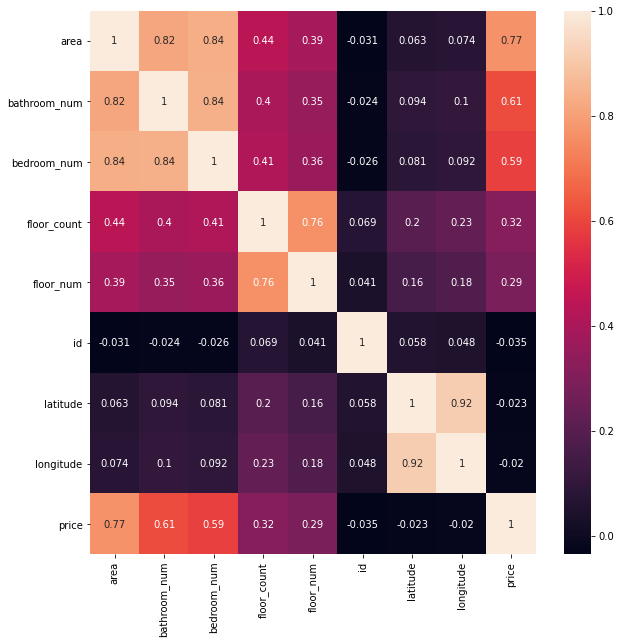

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

I went with df.corr in the very starting in order to see what columns I am supposed to get rid of. As we can see here "id", "latitude", "longitude" columns have very low correlation so we can just get rid of these columns in the very beginnng. 

In [30]:
df.drop(['id','latitude','longitude','id_string','floor_count','floor_num'],axis=1, inplace=True)  #Dropping columns with low corr. 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34348 entries, 0 to 34347
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          33572 non-null  float64
 1   bathroom_num  34334 non-null  float64
 2   bedroom_num   34348 non-null  int64  
 3   city          34348 non-null  object 
 4   desc          34338 non-null  object 
 5   dev_name      17349 non-null  object 
 6   furnishing    34338 non-null  object 
 7   locality      34140 non-null  object 
 8   post_date     34348 non-null  object 
 9   poster_name   34347 non-null  object 
 10  price         34348 non-null  int64  
 11  project       20179 non-null  object 
 12  title         34338 non-null  object 
 13  trans         34318 non-null  object 
 14  type          34348 non-null  object 
 15  url           34338 non-null  object 
 16  user_type     34348 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 4.5+ MB


In [32]:
print("total number of rows: ",len(df))
print("\n")
print("Number of null rows\n",df.isnull().sum())

total number of rows:  34348


Number of null rows
 area              776
bathroom_num       14
bedroom_num         0
city                0
desc               10
dev_name        16999
furnishing         10
locality          208
post_date           0
poster_name         1
price               0
project         14169
title              10
trans              30
type                0
url                10
user_type           0
dtype: int64


In [33]:
for col in df:
  print(col, df[col].unique())

area [350. 652. 635. ... 150. 663. 642.]
bathroom_num [ 2.  1. nan  3.  4.  5.  6.  7.  8.]
bedroom_num [1 4 3 5 2]
city ['Mumbai']
desc ['2 Bath,Unfurnished,East facing The project has 1 elevator for residents in a tower. There is No/Rare Powercut 24 Hours Available water supply.'
 '2 Bath,Semi-Furnished,East facing A 1BHK apartment is available for rent in vasai east mira road and beyond. This apartment is on the 7th of 7 floors in veena dynasty. This 15 year old property has a super builtUp area of 652 sq. Ft. This is an unfurnished apartment.This apartment comes with 2 bathrooms. The apartment with 2 balconiesIs available to only families.It is a fengShuivaastu compliant property. The apartment with ceramic flooring. This is an east facing apartment. With features like intercom facility lifts maintenance staff park securityfire alarm and water storage the society offers a convenient living. It also has other features like waste disposal.This property is in a gated society and has f

In [34]:
df.dropna(axis=0,how='any',inplace=True)  # After going through this case study multiple times I realized it's better to just drop all the nan values. 

In [35]:
df['price_per_sqft'] = df['price']/df['area']

In [36]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(['int64','float64'])

In [37]:
df_cat.head()

,city,desc,dev_name,furnishing,locality,post_date,poster_name,project,title,trans,type,url,user_type
1,Mumbai,"2 Bath,Semi-Furnished,East facing A 1BHK apart...",Veena Group,Semi-Furnished,Vasai,2020-01-11,Gorakh Chavan,Veena Dynasty,"1 BHK Apartment for Rent in Veena Dynasty, Vasai",Rent,Apartment,/propertyDetails/1-BHK-652-Sq-ft-Multistorey-A...,Agent
2,Mumbai,"2 Bath,Semi-Furnished,4 floor,West facing A be...",Agarwal Group,Semi-Furnished,Virar,2019-12-13,Lokesh Joshi,Agarwal Lifestyle,"1 BHK Apartment for Rent in Agarwal Lifestyle,...",Rent,Apartment,/propertyDetails/1-BHK-635-Sq-ft-Multistorey-A...,Agent
4,Mumbai,"1 Bath,Furnished,2 floor,North facing 24 hours...",Millennium Group,Furnished,Naigaon East,2019-12-17,Charmaine Gomez,Mittal Enclave,"1 BHK Apartment for Rent in Mittal Enclave, Na...",Rent,Apartment,/propertyDetails/1-BHK-625-Sq-ft-Multistorey-A...,Owner
5,Mumbai,"2 Bath,Unfurnished,9 floor,North - East facing...",Poonam Developers,Unfurnished,Virar West,2020-01-13,Sen Sales Team,Poonam Park View,"1 BHK Apartment for Rent in Poonam Park View, ...",Rent,Apartment,/propertyDetails/1-BHK-630-Sq-ft-Multistorey-A...,Agent
6,Mumbai,"2 Bath,Furnished,4 floor,East facing This is a...",Evershine Builders,Furnished,Virar,2020-01-13,Harmesh Damania,Evershine Homes,"1 BHK Apartment for Rent in Evershine Homes, V...",Rent,Apartment,/propertyDetails/1-BHK-690-Sq-ft-Multistorey-A...,Agent


In [38]:
df_num.head()

,area,bathroom_num,bedroom_num,price,price_per_sqft
1,652.0,2.0,1,8060,12.361963
2,635.0,2.0,1,8000,12.598425
4,625.0,1.0,1,9000,14.400000
5,630.0,2.0,1,8000,12.698413
6,690.0,2.0,1,8500,12.318841


In [39]:
df_cat.drop(['desc','dev_name','project','url','title','trans','poster_name','post_date','city','type'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
print(df_num.isnull().sum())
print("\n")
print(df_cat.isnull().sum())

area              0
bathroom_num      0
bedroom_num       0
price             0
price_per_sqft    0
dtype: int64


furnishing    0
locality      0
user_type     0
dtype: int64


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_cat:
  df_cat[col]=le.fit_transform(df_cat[col])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
from scipy.stats import skew

print("Checking the distribution of data in every column")
for col in df_num:
  print(col)
  print("Skew: ",skew(df_num[col]))
  #sns.histplot(df_num[col])
  print("----"*5)

Checking the distribution of data in every column
area
Skew:  2.1258738259859515
--------------------
bathroom_num
Skew:  1.2358425741569214
--------------------
bedroom_num
Skew:  0.24227171201752012
--------------------
price
Skew:  4.294647535024238
--------------------
price_per_sqft
Skew:  85.22750428743701
--------------------


AS we can notice that our skew is pretty high for area, bathroom_num, floor_count, floor_num so we are going to try to work on this. 

Skewness should always be in the range of -0.5 to +0.5 

In [43]:
df2 = df_num.copy()

In [44]:
df_num['area'] = np.log(df_num['area'])
skew(df_num['area'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


-0.0012150139261569617

In [45]:
df_num['bathroom_num'] = np.sqrt(df_num['bathroom_num'])
skew(df_num['bathroom_num'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.5398819482200872

In [46]:
df_num['bedroom_num'].value_counts()

2    7033
3    5486
1    3305
4    1190
5      91
Name: bedroom_num, dtype: int64

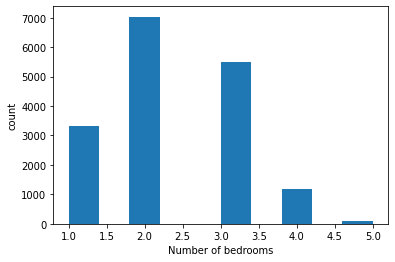

In [47]:
plt.hist(df_num['bedroom_num'])
plt.xlabel('Number of bedrooms')
plt.ylabel('count')
plt.show()

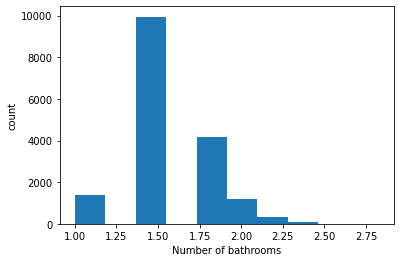

In [48]:
plt.hist(df_num['bathroom_num'], density=False, histtype='stepfilled')
plt.xlabel('Number of bathrooms')
plt.ylabel('count')
plt.show()

In [49]:
df_num.corr()

,area,bathroom_num,bedroom_num,price,price_per_sqft
area,1.000000,0.801590,0.885137,0.667237,-0.055581
bathroom_num,0.801590,1.000000,0.824630,0.591168,0.054983
bedroom_num,0.885137,0.824630,1.000000,0.582484,0.054796
price,0.667237,0.591168,0.582484,1.000000,0.185488
price_per_sqft,-0.055581,0.054983,0.054796,0.185488,1.000000


In [50]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [51]:
df_new.head()

,area,bathroom_num,bedroom_num,price,price_per_sqft,furnishing,locality,user_type
1,6.480045,1.414214,1,8060,12.361963,1,410,0
2,6.453625,1.414214,1,8000,12.598425,1,426,0
4,6.437752,1.000000,1,9000,14.400000,0,282,2
5,6.445720,1.414214,1,8000,12.698413,2,428,0
6,6.536692,1.414214,1,8500,12.318841,0,426,0


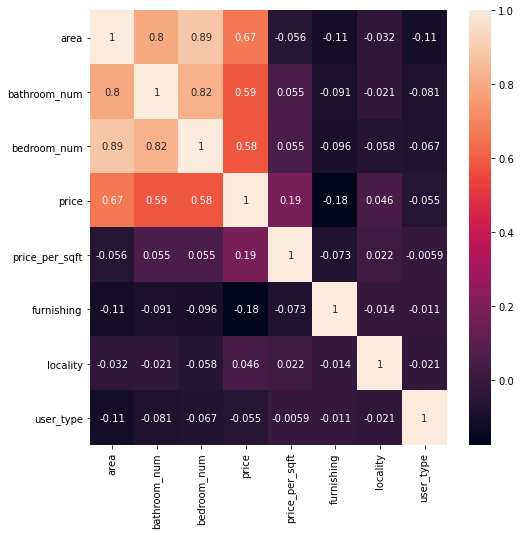

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

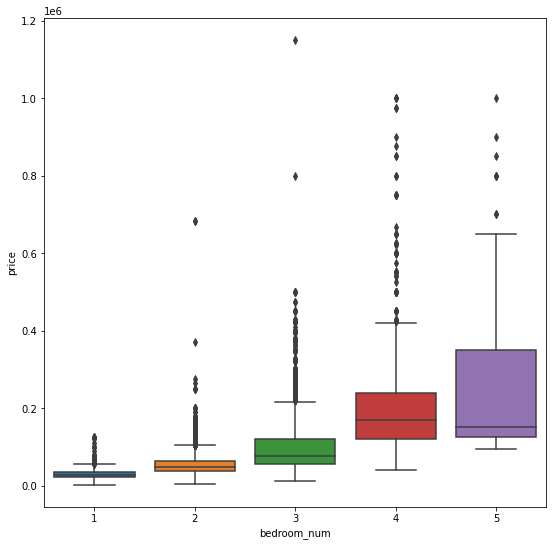

In [53]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df_new, x='bedroom_num',y='price',orient="v")
plt.show()

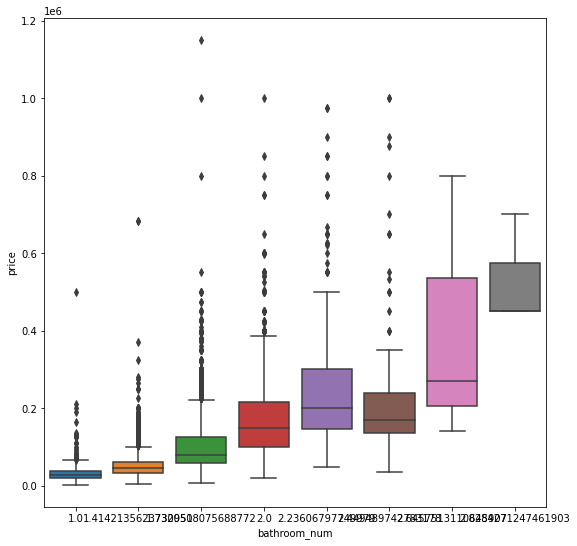

In [54]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df_new, x='bathroom_num',y='price',orient="v")
plt.show()

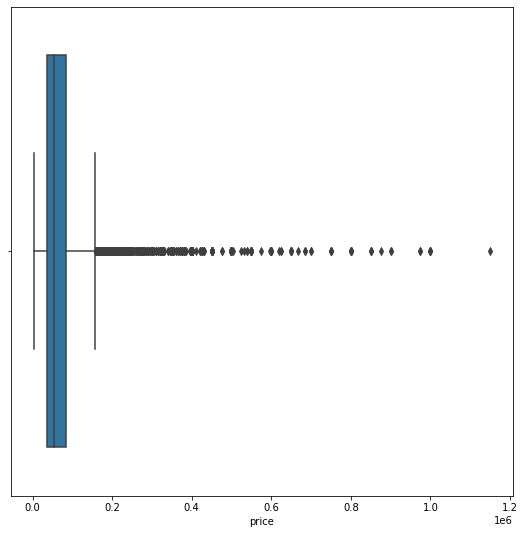

In [55]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df_new, x='price', linewidth=1.5)
plt.show()

In [56]:
# To find outliers

q1 = df_new['price'].quantile(0.25)
q3 = df_new['price'].quantile(0.75)
IQR = q3-q1
Upper_range = q3 + IQR*1.5
print(q1, q3)
print(Upper_range)
print(len(df_new))

36000.0 85000.0
158500.0
17105


In [57]:
df_new[df_new['price'] > Upper_range]

,area,bathroom_num,bedroom_num,price,price_per_sqft,furnishing,locality,user_type
1222,8.160518,2.000000,4,170000,48.571429,1,305,0
1223,7.824046,2.000000,4,165000,66.000000,1,21,0
1224,7.600902,2.236068,4,170000,85.000000,1,440,0
1225,7.761745,2.236068,4,190000,80.885483,1,440,0
1226,8.003697,2.236068,4,170000,56.818182,1,224,0
...,...,...,...,...,...,...,...,...
34076,7.843849,1.732051,3,400000,156.862745,2,129,0
34077,7.955074,1.732051,3,450000,157.894737,1,324,0
34087,8.160518,2.000000,3,425000,121.428571,1,237,0
34088,7.803843,1.732051,3,425000,173.469388,0,324,0


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()

x = df_new.drop(['furnishing','locality','user_type','price_per_sqft','price'], axis=1)
y = df_new['price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)

print("MSE = ", mean_squared_error(y_test, y_predict))
print("R2_score: ",r2_score(y_test, y_predict))
#print(x_test)
#print(lr.predict(x_test))

MSE =  2631193962.3400574
R2_score:  0.4676357694371054


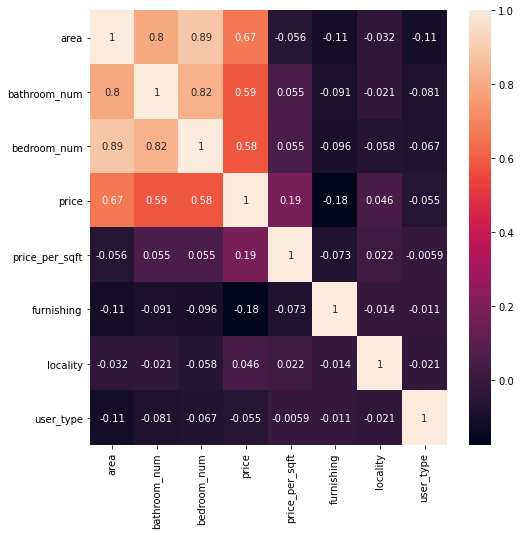

In [59]:
# Correlation between independent variables test #Fail since dependent variables are correlated with each other. 
plt.figure(figsize=(8,8)) 
sns.heatmap(df_new.corr(), annot=True)
plt.show()

In [60]:
y_predict = lr.predict(x_test)
y_predict_train = lr.predict(x_train)
print("Bias = ", r2_score(y_train, y_predict_train))
print("Variance = ", r2_score(y_test, y_predict))
# Variance should be less than bias if its not then there is need for regularization. 

Bias =  0.4548546899720134
Variance =  0.4676357694371054


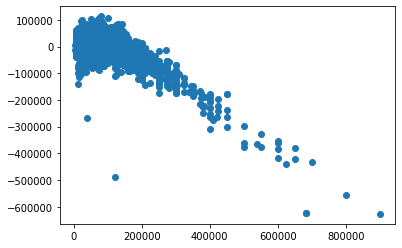

In [61]:
# The residuals are homoskedastial
residuals = y_predict - y_test
plt.scatter(y_test, residuals )
plt.show()

Skew of residuals =  -4.072248843021644


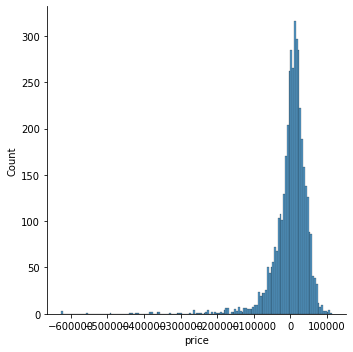

In [62]:
# Checking if residuals are normally distributed
print("Skew of residuals = ",skew(residuals))
sns.displot(residuals)
plt.show()

#Since residuals are not normally distributed this test also fails. 

In [63]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
x1 = df_new.drop(['furnishing','locality','user_type','price_per_sqft','price'], axis=1)
y1 = df_new['price']

x_trn, x_tst, y_trn, y_tst = train_test_split(x1,y1, test_size=0.25)

x_poly_trn2 = pf.fit_transform(x_trn)
x_poly_tst2 = pf.fit_transform(x_tst)

lr_poly2 = LinearRegression()
lr_poly2.fit(x_poly_trn2, y_trn)

y_pred_trn = lr_poly2.predict(x_poly_trn2)
y_pred_tst = lr_poly2.predict(x_poly_tst2)

print("Slope : {}\n Intercept : {}".format(lr_poly2.coef_,lr_poly2.intercept_))
print("r2_score : {}".format(lr_poly2.score(x_poly_tst2,y_tst)))

Slope : [ 0.00000000e+00 -6.12694457e+05 -4.36320864e+05 -5.13846903e+04
  4.11081179e+04  8.12794698e+04  7.14938982e+03 -3.84208166e+04
 -4.70021866e+03 -3.63583775e+02]
 Intercept : 2234011.548036698
r2_score : 0.6103585409626063


In [64]:
residuals_poly = y_pred_tst - y_tst
bias = r2_score(y_trn, y_pred_trn)
variance = r2_score(y_tst, y_pred_tst)
print("Bias = {}\n Variance = {}".format(bias, variance))

Bias = 0.5789611772330473
 Variance = 0.6103585409626063


Skew : -4.072248843021644


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


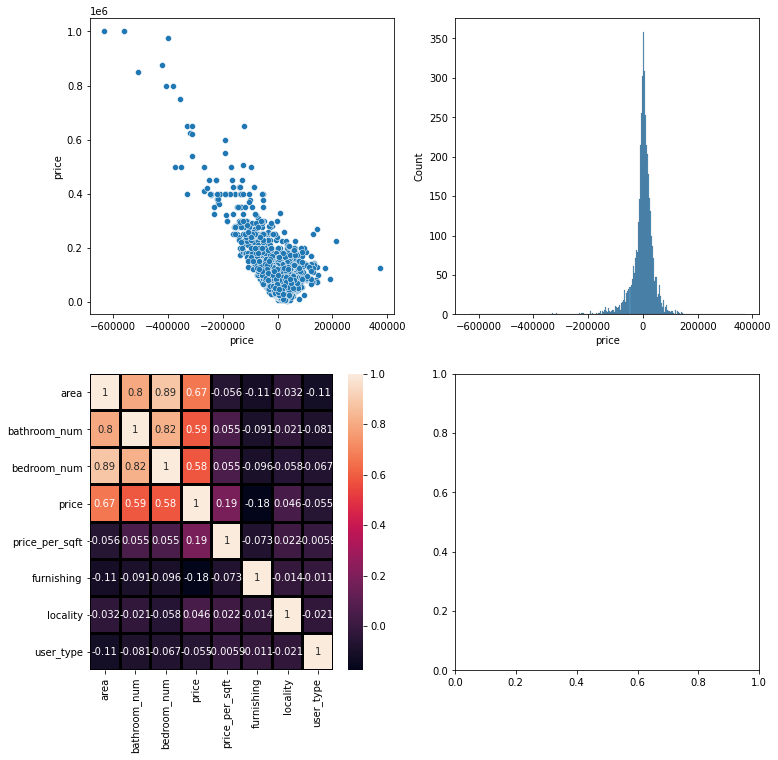

In [65]:
#Multi-correlation test failed
#Normal distribution test failed
#Homoskedatial pass
fig, axes = plt.subplots(2,2, figsize=(12,12))
print("Skew :",skew(residuals))
sns.heatmap(df_new.corr(), annot=True, linewidth=2, linecolor='black', ax=axes[1][0])
sns.histplot(residuals_poly, ax=axes[0][1])
sns.scatterplot(residuals_poly, y_tst, ax=axes[0][0])
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.svm import LinearSVR, SVR

**Decision Tree Regressor test**

0.3714749519794328
0.540775779285376
0.610167737603935
0.6181910543163902
0.6038970008801845
0.5985755307597298
0.5732516993304089
0.5860943956190423
0.5755608807446385


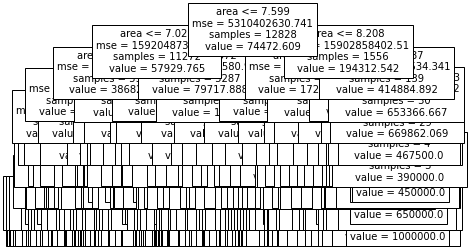

In [67]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.25)

for i in range(1,10):
  dtr = DecisionTreeRegressor(max_depth=i)
  dtr.fit(x_train1, y_train1)
  print(dtr.score(x_test1, y_test1))

  tree.plot_tree(dtr.fit(x_train1, y_train1), feature_names=list(df), fontsize=10)
# with max_depth as 6 we are getting the best results.

[Text(186.11221529284165, 206.56799999999998, 'area <= 7.599\nmse = 5310402630.741\nsamples = 12828\nvalue = 74472.609'),
 Text(90.47452548806942, 184.824, 'area <= 7.022\nmse = 1592048735.231\nsamples = 11272\nvalue = 57929.765'),
 Text(47.59189262472885, 163.07999999999998, 'area <= 6.792\nmse = 474388403.126\nsamples = 5985\nvalue = 38682.68'),
 Text(20.153362255965295, 141.336, 'area <= 6.55\nmse = 232530919.401\nsamples = 3195\nvalue = 30839.375'),
 Text(7.171691973969631, 119.592, 'area <= 3.375\nmse = 177806561.393\nsamples = 2084\nvalue = 27860.238'),
 Text(3.6312364425162693, 97.848, 'bathroom_num <= 1.573\nmse = 6250000.0\nsamples = 2\nvalue = 122500.0'),
 Text(2.9049891540130153, 76.10399999999998, 'mse = 0.0\nsamples = 1\nvalue = 125000.0'),
 Text(4.3574837310195225, 76.10399999999998, 'mse = 0.0\nsamples = 1\nvalue = 120000.0'),
 Text(10.712147505422994, 97.848, 'bedroom_num <= 1.5\nmse = 169359172.34\nsamples = 2082\nvalue = 27769.325'),
 Text(5.8099783080260305, 76.10399

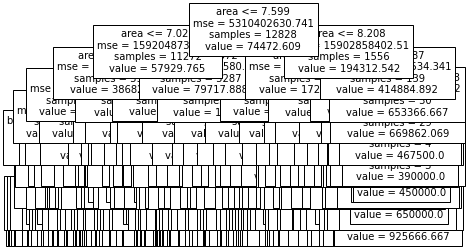

In [68]:
dt = DecisionTreeRegressor(splitter='best', max_depth=6, min_samples_split=2, min_samples_leaf=1)
dt.fit(x_train1, y_train1)
dt.score(x_test1, y_test1)
y_pred = dt.predict(x_test1)
tree.plot_tree(dtr.fit(x_train1, y_train1), feature_names=list(df), fontsize=10)

In [69]:
df_dt = pd.DataFrame({'Target original':y_test1,
                      'Target predicted':y_pred})
df_dt.head(10)

,Target original,Target predicted
16242,50000,49562.354762
20808,55000,74445.511424
5593,24500,31685.129412
16391,40000,74445.511424
8974,32000,27310.320840
21002,60000,49562.354762
19177,46000,63494.418514
15061,35000,63494.418514
22892,75000,49562.354762
33020,175000,136923.928328


In [77]:
df_dt_ip = pd.DataFrame({'Area_of_flat':input("Enter the area of the flat : "),
                         'Bedroom_num' : input("Enter the number of bedrooms : "),
                         'Bathroom_num' : input("Enter the number of bathrooms : ")
                         }, index=range(1))

Enter the area of the flat : 3000
Enter the number of bedrooms : 4
Enter the number of bathrooms : 4


In [78]:
dt.predict(df_dt_ip)


array([390000.])